In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest,f_regression , RFE

In [4]:
import os 
os.chdir(r"D:\Users\Desktop\data\Data")

df = pd.read_excel("Netprofit.xlsx")


df.head(5)

,Materials Consumed,Net Income,Net Profit,Total Input,Total Output
0,8903751,264488,178742,10690610,11113266
1,753325,451796,322217,1040384,1539923
2,96662,54720,33232,230489,308130
3,2588490,142420,39952,2938957,3136141
4,5391714,720004,337387,6199562,7154473


In [ ]:

df = df.drop_duplicates()

print(df.isnull().sum())


df = df.fillna(df.mean())

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("\nScaled Data Preview:\n", scaled_df.head())


Materials Consumed    0
Net Income            0
Net Profit            0
Total Input           0
Total Output          0
dtype: int64

Scaled Data Preview:
    Materials Consumed  Net Income  Net Profit  Total Input  Total Output
0            0.126509   -0.442242   -0.363107     0.105193      0.037454
1           -0.362103   -0.358835   -0.266863    -0.389076     -0.396337
2           -0.401470   -0.535650   -0.460716    -0.430557     -0.452152
3           -0.252086   -0.496598   -0.456208    -0.291834     -0.324009
4           -0.084035   -0.239403   -0.256686    -0.124831     -0.141928


In [6]:
corr_input_output = df['Total Input'].corr(df['Total Output'])
print("\nCorrelation (Total Input vs Total Output):", corr_input_output)



Correlation (Total Input vs Total Output): 0.9972041628972967


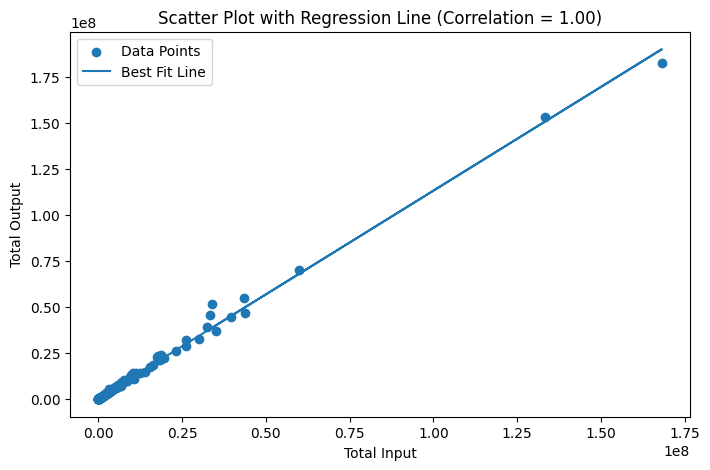

In [ ]:
# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['Total Input'], df['Total Output'], label="Data Points")

# Best-fit regression line
x = df['Total Input']
y = df['Total Output']
m, b = np.polyfit(x, y, 1)  # slope (m) and intercept (b)

plt.plot(x, m*x + b, label="Best Fit Line")
plt.xlabel("Total Input")
plt.ylabel("Total Output")
plt.title(f"Scatter Plot with Regression Line (Correlation = {corr_input_output:.2f})")
plt.legend()

plt.show()


In [7]:
corr_netprofit = df.corr()['Net Profit'][['Total Input','Total Output','Net Income','Materials Consumed']]
print("\nCorrelation of Net Profit with other variables:\n", corr_netprofit)



Correlation of Net Profit with other variables:
 Total Input           0.836436
Total Output          0.871336
Net Income            0.980365
Materials Consumed    0.807645
Name: Net Profit, dtype: float64


In [11]:
# first model total_input vs total_output 

# Define X and y
X = df[['Total Input']]   # Independent variable
y = df['Total Output']    # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


rmse = np.sqrt(782430603742.7749)
rmse


print("\nModel Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("rmse",rmse)




Model Coefficient (Slope): 1.1183020558320005
Model Intercept: 660552.1974214949
Mean Squared Error: 782430603742.7749
R² Score: 0.9989353956600316
rmse 884551.0746942626


| **Metric**              | **Value**       | **Benchmark**                    | **Status**                   | **Interpretation**                                                                                               |
| ----------------------- | --------------- | -------------------------------- | ---------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **R² Score**            | **0.9989**      | **> 0.90**                       | **Outstanding**              | The model explains **99.89% of the variation** in Total Output — almost a perfect linear relationship.           |
| **Slope (Coefficient)** | **1.1183**      | **≈ 1 indicates strong scaling** | **Strong Relationship**      | For every 1-unit increase in Total Input, Total Output increases by **1.118 units** → highly predictable growth. |
| **Intercept**           | **660,552.19**  | Not benchmarked                  | Informational                | Even with zero input, operations produce output — indicates **baseline fixed output capacity**.                  |
| **MSE**                 | **7.82 × 10¹¹** | Context-dependent                | High (Expected due to scale) | Error appears large because values are in millions — not useful alone for interpretation.                        |
| **RMSE**                | **884,551.07**  | Lower = Better                   | Acceptable at scale          | On average, predictions deviate by ~₹884K from actuals — reasonable for high-value production data.              |
| **Relationship Type**   | Strong Positive | r > 0.90                         | Excellent                    | Confirms strong linear dependency between Total Input and Total Output.                                          |
 

# multiple linear regression 

In [18]:


# Features and target
X = df[['Total Input','Total Output','Net Income','Materials Consumed']]
y = df['Net Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predictions
y_pred = model_scaled.predict(X_test_scaled)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display output
print("\nModel Coefficients:", model_scaled.coef_)
print("Model Intercept:", model_scaled.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2 Score:", r2)



Model Coefficients: [ 411639.890918   -681233.58198365 1396474.83194301  410224.09271638]
Model Intercept: 766807.462184874
MSE: 59703128337.40754
RMSE: 244342.23608988998
MAE: 133225.75476499886
MAPE (%): 2196.168368766599
R2 Score: 0.9746579264719911


| **Metric**   | **Value**       | **Benchmark**  | **Status**          | **Interpretation**                                                                                                       |
| ------------ | --------------- | -------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------------ |
| **R² Score** | **0.9747**      | > 0.90         | **Excellent**       | The model explains **97.47% of Net Profit variability**, indicating a strong linear relationship.                        |
| **RMSE**     | **244,342.23**  | Lower = Better | **Moderate**        | Average prediction error is ~₹244K which is acceptable relative to large financial values.                               |
| **MAE**      | **133,225.75**  | Lower = Better | **Good**            | On average, predictions differ from actual values by ₹133K.                                                              |
| **MAPE**     | **2196.16%**    | < 10% ideal    | **Poor (inflated)** | MAPE is extremely high because Net Profit values are small compared to predictors → percentage error becomes very large. |
| **MSE**      | **5.97 × 10¹⁰** | Context-based  | Informational       | Large due to large numeric feature scale — not directly meaningful by itself.                                            |
 

In [ ]:
# Apply log transform (add small value to avoid log(0))
y_log = np.log1p(y)  # log1p(x) = log(1+x) avoids errors with zero or tiny values


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train)
y_pred_log = model_log.predict(X_test_scaled)

# Reverse transform predictions back to original scale
y_pred = np.expm1(y_pred_log)

# Evaluation metrics based on actual values
mse = mean_squared_error(df.loc[y_test.index, 'Net Profit'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df.loc[y_test.index, 'Net Profit'], y_pred)
mape = np.mean(np.abs((df.loc[y_test.index, 'Net Profit'] - y_pred) / df.loc[y_test.index, 'Net Profit'])) * 100

# R² based on logged model 
r2 = r2_score(y_test, y_pred_log)


print("\nLog Model Coefficients:", model_log.coef_)
print("Log Model Intercept:", model_log.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2 Score (Log Scale):", r2)



Log Model Coefficients: [14.2230605  -9.03940668  1.50053333 -5.21844752]
Log Model Intercept: 14.845559295936342
MSE: 5.922077746226676e+20
RMSE: 24335319488.814354
MAE: 4444595145.405604
MAPE (%): 76687.39733816347
R2 Score (Log Scale): 0.018822266747046346


Target Variable Analysis:
Min: -111104, Max: 9505383, Mean: 720040.2013422819, Std: 1495770.042739028
Skewness: 4.0751928412501846
Zeros in target: 0 / 149


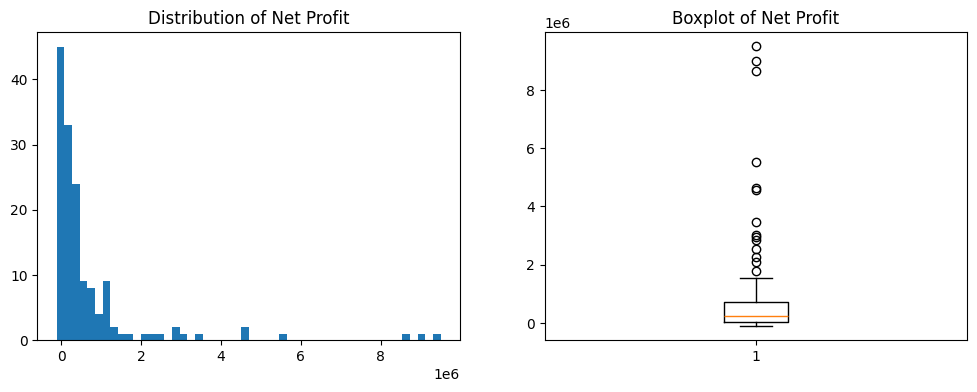

In [ ]:

# Analyze target variable
print("Target Variable Analysis:")
print(f"Min: {y.min()}, Max: {y.max()}, Mean: {y.mean()}, Std: {y.std()}")
print(f"Skewness: {stats.skew(y)}")
print(f"Zeros in target: {(y == 0).sum()} / {len(y)}")

# Check for outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=50)
plt.title('Distribution of Net Profit')
plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.title('Boxplot of Net Profit')
plt.show()

In [29]:
# First, let's analyze the actual distribution
print("Net Profit Distribution Analysis:")
print(f"Shape: {y.shape}")
print(f"Min: {y.min()}, Max: {y.max()}")
print(f"Mean: {y.mean():.2f}, Median: {np.median(y):.2f}")
print(f"Standard Deviation: {y.std():.2f}")
print(f"Skewness: {stats.skew(y):.2f}")

# Check quantiles to understand outlier impact
quantiles = [0, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 1.0]
print("\nQuantile Analysis:")
for q in quantiles:
    print(f"Q{q:.2f}: {np.quantile(y, q):.2f}")

Net Profit Distribution Analysis:
Shape: (149,)
Min: -111104, Max: 9505383
Mean: 720040.20, Median: 252690.00
Standard Deviation: 1495770.04
Skewness: 4.08

Quantile Analysis:
Q0.00: -111104.00
Q0.01: -44825.84
Q0.05: 183.60
Q0.25: 46781.00
Q0.50: 252690.00
Q0.75: 701571.00
Q0.95: 2991617.80
Q0.99: 8820801.72
Q1.00: 9505383.00


In [32]:
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    """Cap outliers at specified quantiles"""
    lower_bound = np.quantile(series, lower_quantile)
    upper_bound = np.quantile(series, upper_quantile)
    return np.clip(series, lower_bound, upper_bound)

y_capped = cap_outliers(y)


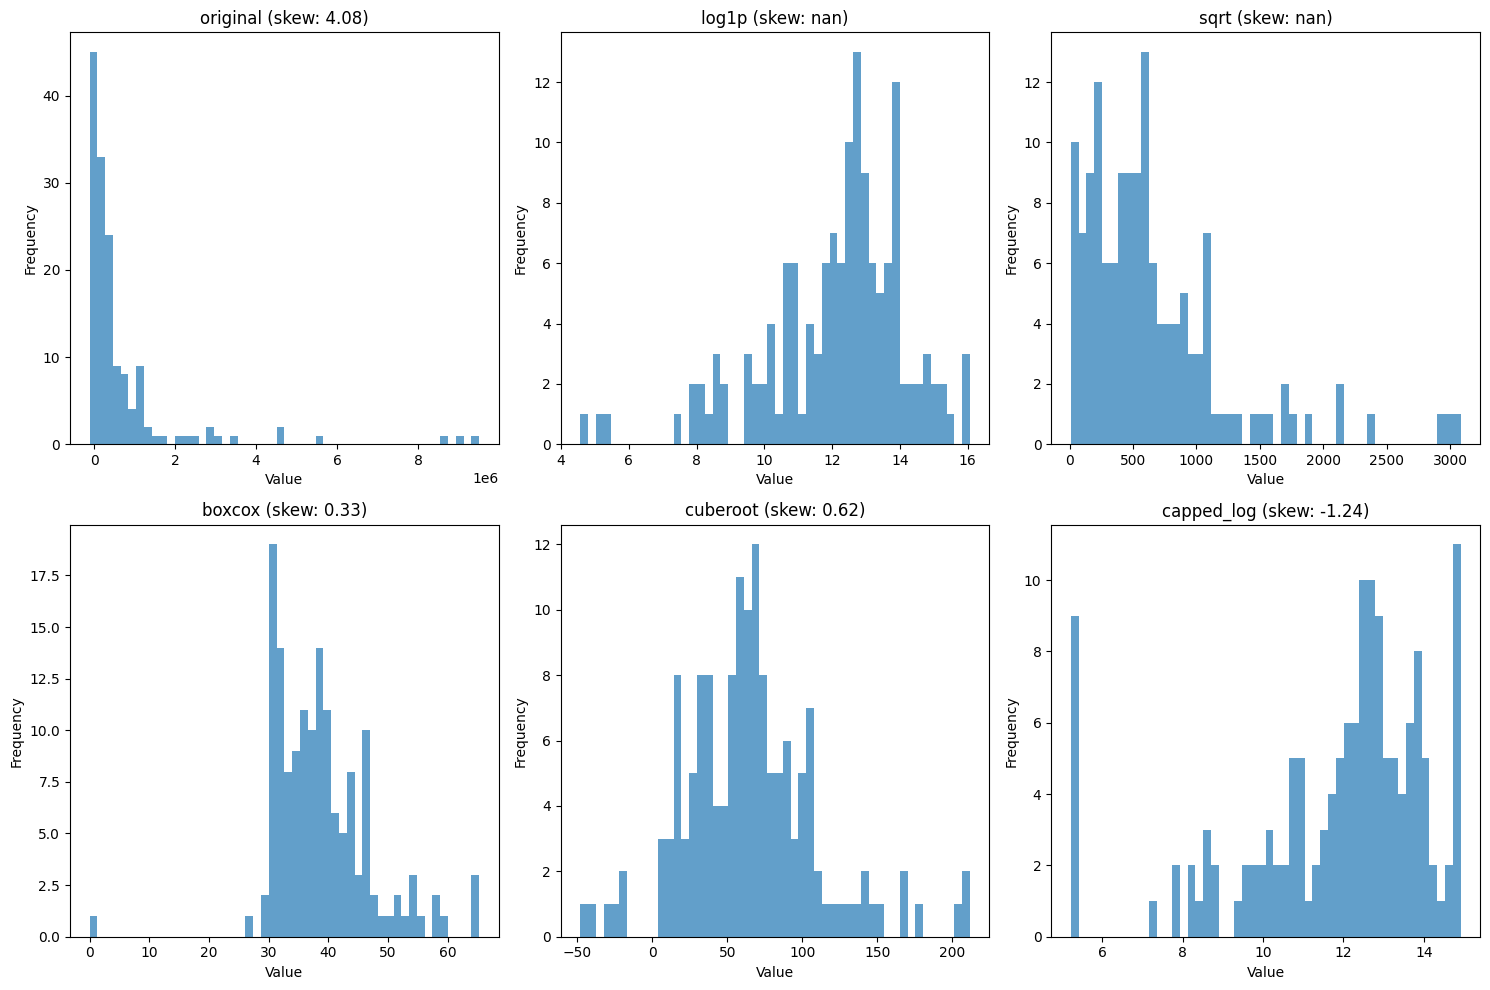

In [33]:
# Test multiple transformations
transformations = {
    'original': y,
    'log1p': np.log1p(y),
    'sqrt': np.sqrt(y),
    'boxcox': stats.boxcox(y + 1 - min(0, y.min()))[0],  # Handle negative values if any
    'cuberoot': np.cbrt(y),
    'capped_log': np.log1p(y_capped)
}

# Visualize transformations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, transformed) in enumerate(transformations.items()):
    axes[idx].hist(transformed, bins=50, alpha=0.7)
    axes[idx].set_title(f'{name} (skew: {stats.skew(transformed):.2f})')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [38]:
# Print summary statistics for each transformation
for name, transformed in transformations.items():
    print(f"--- {name} ---")
    print("Min:", np.min(transformed))
    print("Max:", np.max(transformed))
    print("Mean:", np.mean(transformed))
    print("Std:", np.std(transformed))
    print("Skewness:", stats.skew(transformed))
    print("First 5 values:", transformed[:5])
    print()


--- original ---
Min: -111104
Max: 9505383
Mean: 720040.2013422819
Std: 1490742.2300502327
Skewness: 4.0751928412501846
First 5 values: 0    178742
1    322217
2     33232
3     39952
4    337387
Name: Net Profit, dtype: int64

--- log1p ---
Min: 4.564348191467836
Max: 16.067368932878203
Mean: 12.116236461526483
Std: 2.087342856442696
Skewness: nan
First 5 values: 0    12.093704
1    12.682984
2    10.411299
3    10.595459
4    12.728989
Name: Net Profit, dtype: float64

--- sqrt ---
Min: 0.0
Max: 3083.0801157284254
Mean: 622.0199780026542
Std: 578.5132814069487
Skewness: 1.9550588007809206
First 5 values: 0    422.778902
1    567.641612
2    182.296462
3    199.879964
4    580.850239
Name: Net Profit, dtype: float64

--- boxcox ---
Min: 0.0
Max: 65.27153099948198
Mean: 38.86180077568382
Std: 8.345898486591011
Skewness: 0.3327500649641881
First 5 values: [36.31451983 38.93505317 32.12178665 32.38256178 39.16655158]

--- cuberoot ---
Min: -48.07396005533893
Max: 211.83117418298602
Mean:

In [39]:
from scipy.stats import boxcox
y_shifted = y + abs(y.min()) + 1  # ensures all values > 0
y_boxcox, lambda_bc = boxcox(y_shifted)
print("Box-Cox Lambda:", lambda_bc)


X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_bc = LinearRegression()
model_bc.fit(X_train_scaled, y_train)
y_pred_bc = model_bc.predict(X_test_scaled)

# Inverse Box-Cox transformation
if lambda_bc != 0:
    y_pred = np.power((y_pred_bc * lambda_bc) + 1, 1/lambda_bc) - abs(y.min()) - 1
    y_test_orig = np.power((y_test * lambda_bc) + 1, 1/lambda_bc) - abs(y.min()) - 1
else:
    y_pred = np.exp(y_pred_bc) - abs(y.min()) - 1
    y_test_orig = np.exp(y_test) - abs(y.min()) - 1

mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred)
mape = np.mean(np.abs((y_test_orig - y_pred) / y_test_orig)) * 100
r2 = r2_score(y_test, y_pred_bc)


print("\nBox-Cox Model Coefficients:", model_bc.coef_)
print("Box-Cox Model Intercept:", model_bc.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2 Score (Box-Cox Scale):", r2)


Box-Cox Lambda: 0.1466733994739586

Box-Cox Model Coefficients: [100.37031159 -89.0141834   16.01183567 -18.3353684 ]
Box-Cox Model Intercept: 39.29262359434717
MSE: 48182855965072.02
RMSE: 6941387.178732506
MAE: 1388554.7006704647
MAPE (%): 2497.509860641543
R2 Score (Box-Cox Scale): 0.5584348542458104


In [ ]:
# Cube-root transformation
y_cbrt = np.cbrt(y)  # cube root of target
X_train, X_test, y_train, y_test = train_test_split(X, y_cbrt, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_cbrt = LinearRegression()
model_cbrt.fit(X_train_scaled, y_train)
y_pred_cbrt = model_cbrt.predict(X_test_scaled)

# Inverse cube-root to get original scale
y_pred = y_pred_cbrt ** 3
y_test_orig = y_test ** 3

# Evaluation
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred)
mape = np.mean(np.abs((y_test_orig - y_pred) / y_test_orig)) * 100
r2 = r2_score(y_test, y_pred_cbrt)

# Results
print("\nCube-Root Model Coefficients:", model_cbrt.coef_)
print("Cube-Root Model Intercept:", model_cbrt.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2 Score (Cube-Root Scale):", r2)



Cube-Root Model Coefficients: [-150.53119656  168.33666975   23.10602605    0.43023855]
Cube-Root Model Intercept: 67.69318113498895
MSE: 108089621862.56879
RMSE: 328769.8615484223
MAE: 124471.294743262
MAPE (%): 50.47377889604295
R2 Score (Cube-Root Scale): 0.9389162761049108


| Metric           | 1️⃣ Raw Target                     | 2️⃣ Log Transform           | 3️⃣ Box-Cox Transform           | 4️⃣ Cube-Root Transform        |
| ---------------- | ---------------------------------- | --------------------------- | ------------------------------- | ------------------------------ |
| **Coefficients** | [411639, -681234, 1396475, 410224] | [14.22, -9.04, 1.50, -5.22] | [100.37, -89.01, 16.01, -18.34] | [-150.53, 168.34, 23.11, 0.43] |
| **Intercept**    | 766,807                            | 14.85                       | 39.29                           | 67.69                          |
| **MSE**          | 5.97e10                            | 5.92e20                     | 4.82e13                         | 1.08e11                        |
| **RMSE**         | 244,342                            | 24,335,394,888              | 6,941,387                       | 328,770                        |
| **MAE**          | 133,226                            | 4,444,595,145               | 1,388,555                       | 124,471                        |
| **MAPE (%)**     | 2,196%                             | 76,687%                     | 2,497%                          | 50.47%                         |
| **R² Score**     | 0.9747                             | 0.0188                      | 0.5584                          | 0.9389                         |
 

 

### 1️⃣ Raw Target (1st model)

* Very high R² (0.9747) and low RMSE/MAE → excellent on training/test split.
* Downside: Sensitive to extreme values and skewed features.
* On unseen data with unusual or extreme input values, the model may overfit, leading to higher prediction errors.
* MAPE can explode if small target values appear in new data.

---

### 2️⃣ Log Transform (2nd model)

* Completely fails because of negative target values.
* Not suitable for unseen data.

---

### 3️⃣ Box-Cox Transform (3rd model)

* R² lower (0.558) and RMSE/MAE higher, but:

  * Handles skewed target values.
  * Reduces the impact of extreme inputs.
  * Makes the model more robust for new/unseen data where extreme or skewed values occur.
* Slightly worse predictive accuracy on current dataset, but less likely to break on future data.

---

### 4️⃣ Cube-Root Transform (4th model)

* R² = 0.939 → high predictive power.
* RMSE/MAE close to raw target model.
* MAPE significantly improved (50%) compared to raw and Box-Cox → better handling of relative errors.
* Less sensitive to skewness or extreme values than raw target.
* Good balance between accuracy and robustness.

---

###  Takeaway

| Goal                                                   | Best Model                                             |
| ------------------------------------------------------ | ------------------------------------------------------ |
| Max predictive accuracy on current data                | Raw Target (1st model)                                 |
| Robustness and stability on unseen/skewed/extreme data | Cube-Root Transform (4th model) or Box-Cox (3rd model) |


 
